In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [4]:
d = pd.read_csv('../tables/d.csv', parse_dates=['Time_Start', 'Time_Stop', 'Time_Mid'])
d_no_na = d.dropna(subset=['RI']).reset_index(drop=True)
ind = list(range(0, len(d_no_na)))
d_sp = d_no_na[d_no_na['Time_Mid']<'2024-07-01'].reset_index(drop=True)
d_su = d_no_na[d_no_na['Time_Mid']>'2024-07-01'].reset_index(drop=True)

In [5]:
# Run above code for remaining cells to function

Text(0, 0.5, 'RI')

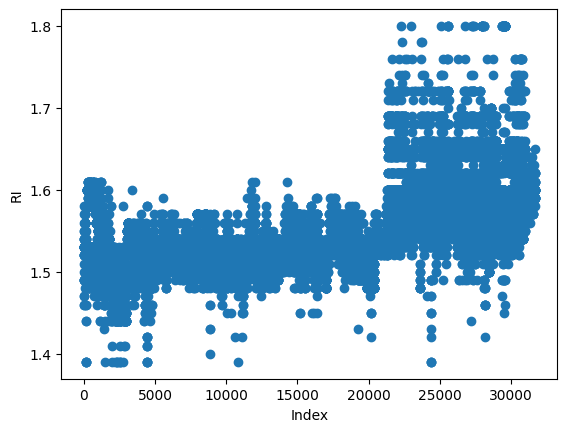

In [6]:
fig, ax = plt.subplots()
ax.scatter(ind, d['RI'], label='Time_Mid')
ax.set_xlabel('Index')
ax.set_ylabel('RI')

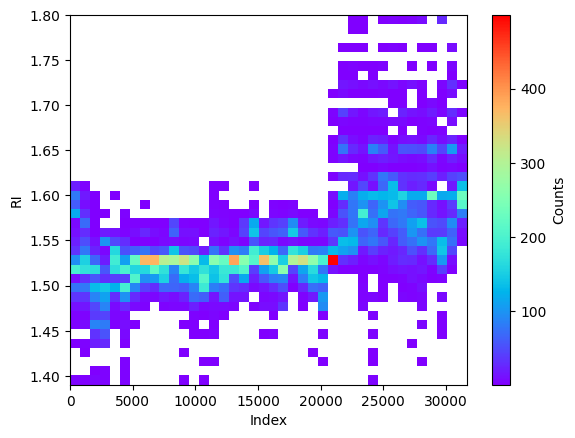

In [7]:
fig, ax = plt.subplots()
# Create a 2D histogram
h = ax.hist2d(ind, d['RI'], bins=(40, 40), cmap='rainbow', cmin=1)
ax.set_xlabel('Index')
ax.set_ylabel('RI')
plt.colorbar(h[3], ax=ax, label='Counts')  # Add a colorbar for density

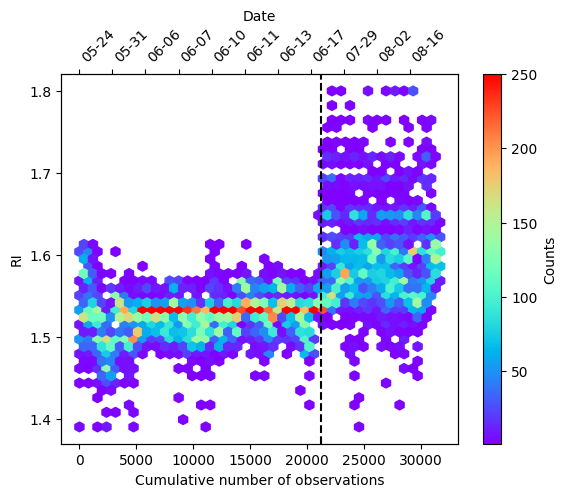

In [8]:
fig, ax = plt.subplots()
# Create a hexbin plot
hb = ax.hexbin(ind, d['RI'], gridsize=40, cmap='rainbow', mincnt=1, vmax=250)
ax.set_xlabel('Cumulative number of observations')
ax.set_ylabel('RI')
ax.axvline(21227, c='black', alpha=1, ls='--')
# Set the positions and labels for the top axis
index_ticks = np.arange(0, ind[-1], 2900)  # Every 5000 index points
date_labels = d_no_na['Time_Mid'].iloc[index_ticks].dt.strftime('%m-%d')  # Format dates
ax2 = ax.twiny()
ax2.set_xticks(index_ticks)
ax2.set_xticklabels(date_labels, rotation=45, ha='left')  # Rotate labels for better readability
ax2.set_xlim(ax.get_xlim())  # Align the top axis limits with the bottom axis
ax2.set_xlabel('Date')
plt.colorbar(hb, ax=ax, label='Counts')  # Add a colorbar for density
plt.savefig('../figures/RI_hexbin.png', dpi=300, bbox_inches='tight')

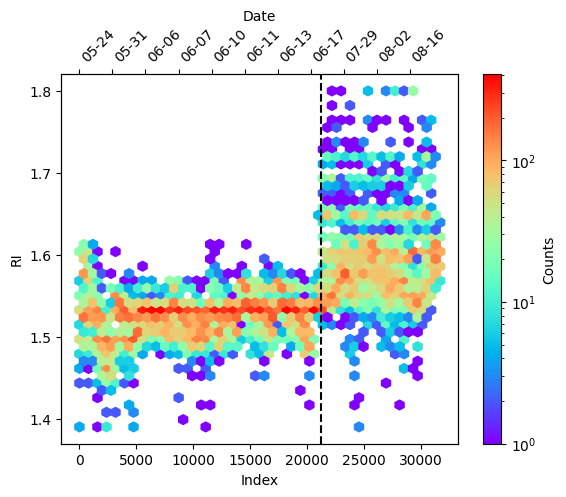

In [9]:
fig, ax = plt.subplots()
# Create a hexbin plot
hb = ax.hexbin(ind, d['RI'], gridsize=40, cmap='rainbow', bins='log')
ax.set_xlabel('Index')
ax.set_ylabel('RI')
ax.axvline(21227, c='black', alpha=1, ls='--')
# Set the positions and labels for the top axis
index_ticks = np.arange(0, ind[-1], 2900)  # Every 5000 index points
date_labels = d_no_na['Time_Mid'].iloc[index_ticks].dt.strftime('%m-%d')  # Format dates
ax2 = ax.twiny()
ax2.set_xticks(index_ticks)
ax2.set_xticklabels(date_labels, rotation=45, ha='left')  # Rotate labels for better readability
ax2.set_xlim(ax.get_xlim())  # Align the top axis limits with the bottom axis
ax2.set_xlabel('Date')
plt.colorbar(hb, ax=ax, label='Counts')  # Add a colorbar for density
plt.savefig('../figures/RI_hexbin_log.png', dpi=300, bbox_inches='tight')

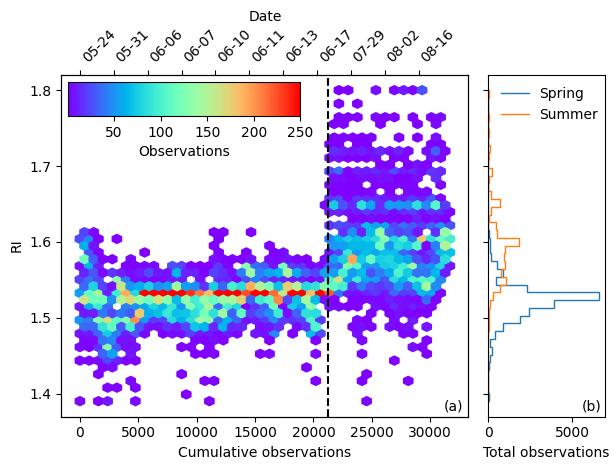

In [10]:
fig, axes = plt.subplots(1,2, sharey=True, gridspec_kw={'width_ratios': [3.5, 1]})
# Create a hexbin plot
ax = axes[0]
hb = ax.hexbin(ind, d['RI'], gridsize=40, cmap='rainbow', mincnt=1, vmax=250)
ax.set_xlabel('Cumulative observations')
ax.set_ylabel('RI')
ax.axvline(21227, c='black', alpha=1, ls='--')
# Set the positions and labels for the top axis
index_ticks = np.arange(0, ind[-1], 2900)  # Every 5000 index points
date_labels = d_no_na['Time_Mid'].iloc[index_ticks].dt.strftime('%m-%d')  # Format dates
ax2 = ax.twiny()
ax2.set_xticks(index_ticks)
ax2.set_xticklabels(date_labels, rotation=45, ha='left')  # Rotate labels for better readability
ax2.set_xlim(ax.get_xlim())  # Align the top axis limits with the bottom axis
ax2.set_xlabel('Date')
# Add text to the top-left corner
ax.text(0.94, 0.05, '(a)', transform=ax.transAxes, verticalalignment='top')

ax = axes[1]
ax.text(0.80, 0.05, '(b)', transform=ax.transAxes, verticalalignment='top')
# Assuming d_sp['RI'] and d_su['RI'] are your datasets
combined_data = np.concatenate([d_sp['RI'], d_su['RI']])
bin_edges = np.linspace(min(combined_data), max(combined_data), num=41)  # 40 bins

# Plot the first histogram with the defined bin edges
counts, _ = np.histogram(d_sp['RI'], bins=bin_edges)
ax.stairs(counts, bin_edges, label='Spring', orientation='horizontal')

# Plot the second histogram with the same bin edges
counts, _ = np.histogram(d_su['RI'], bins=bin_edges)
ax.stairs(counts, bin_edges, label='Summer', orientation='horizontal')
ax.legend(frameon=False)
ax.set_xlabel('Total observations')
#fig.subplots_adjust(hspace =-1.00)
plt.tight_layout()

cbaxes = inset_axes(axes[0], width="57%", height="10%", loc='upper left') 
cbar = plt.colorbar(hb, cax=cbaxes, label='Observations', location='top',pad=-.05)  # Add a colorbar for density
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.xaxis.set_label_position('bottom')
plt.savefig('../figures/RI_hexbin_mult.png', dpi=300, bbox_inches='tight')

In [117]:
dir(cbar.ax)

['ArtistList',
 'AxisDict',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_add_twin_axes',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_axislines',
 '_base_axes_class',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbar',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_different_canvas',
 '

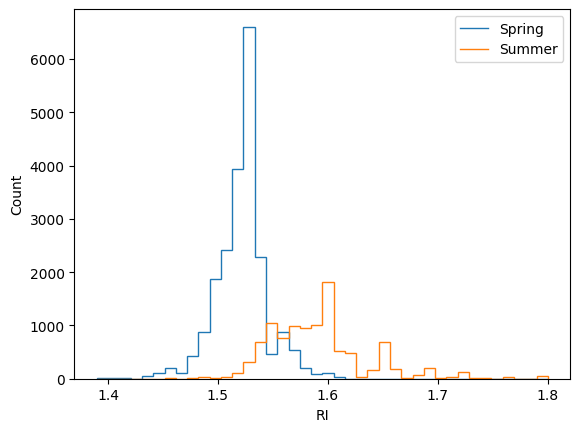

In [58]:
# Assuming d_sp['RI'] and d_su['RI'] are your datasets
combined_data = np.concatenate([d_sp['RI'], d_su['RI']])
bin_edges = np.linspace(min(combined_data), max(combined_data), num=41)  # 40 bins

fig, ax = plt.subplots()

# Plot the first histogram with the defined bin edges
counts, _ = np.histogram(d_sp['RI'], bins=bin_edges)
ax.stairs(counts, bin_edges, label='Spring')

# Plot the second histogram with the same bin edges
counts, _ = np.histogram(d_su['RI'], bins=bin_edges)
ax.stairs(counts, bin_edges, label='Summer')

ax.set_xlabel('RI')
ax.set_ylabel('Count')
ax.legend()
plt.savefig('../figures/RI_stairs.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'Count')

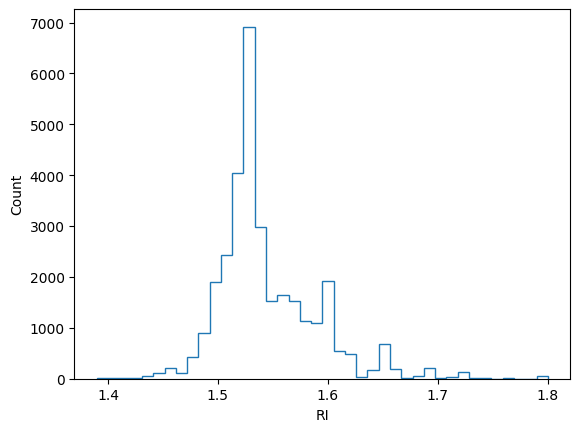

In [40]:
fig, ax = plt.subplots()
counts, bins = np.histogram(d['RI'], bins=40)
ax.stairs(counts, bins)
ax.set_xlabel('RI')
ax.set_ylabel('Count')